In [1]:
!pip install diffusers transformers safetensors accelerate --quiet

In [6]:
from diffusers import StableDiffusionPipeline
import torch

model_path = "sayakpaul/sd-model-finetuned-lora-t4"
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16)
if pipe.safety_checker is not None:
    pipe.safety_checker = lambda images, **kwargs: (images, False)
pipe.unet.load_attn_procs(model_path)
pipe.to("cuda")

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

In [10]:
prompt = "A pokemon with blue eyes. The pokemon is looks like dragon."
image = pipe(prompt, num_inference_steps=90, guidance_scale=7.5).images[0]
image.save("pokemon.png")

  0%|          | 0/90 [00:00<?, ?it/s]

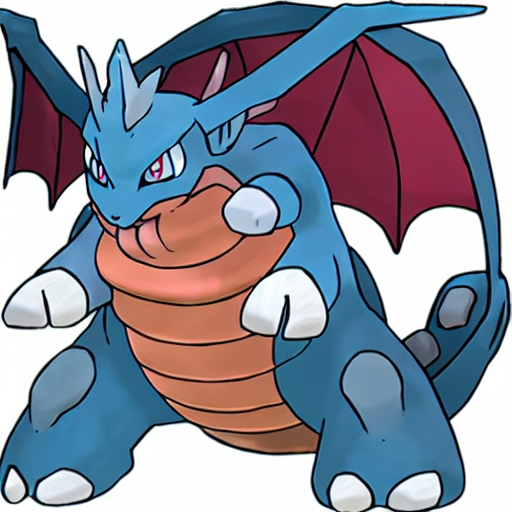

In [11]:
image